In [ ]:
import twint
import pandas as pd
pd.options.display.max_columns = 100
from glob import glob
import os

import matplotlib.pyplot as plt
import seaborn as sns

import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import re

import string
re.compile('<title>(.*)</title>')
import nest_asyncio
nest_asyncio.apply()

import spacy

from itertools import chain
import collections
from collections import Counter

In [5]:
pip install twint

     |████████████████████████████████| 1.3 MB 8.3 MB/s 
     |████████████████████████████████| 263 kB 49.8 MB/s 
     |████████████████████████████████| 378 kB 42.7 MB/s 
     |████████████████████████████████| 291 kB 50.4 MB/s 
     |████████████████████████████████| 160 kB 50.4 MB/s 
     |████████████████████████████████| 294 kB 51.9 MB/s 
  Created wheel for twint: filename=twint-2.1.20-py3-none-any.whl size=33930 sha256=718621a30564cb0efc88ccd28f0c20fc060cc1af63e366e52f59366f6177540e
  Stored in directory: /root/.cache/pip/wheels/44/fc/77/99887a36b5c265a87516158858697d1a0b8f32c4d4dbddbb24
  Created wheel for fake-useragent: filename=fake_useragent-0.1.11-py3-none-any.whl size=13502 sha256=5c8bd63f0d7fb662c2a08e141ccf6ddc297c1b36ed23129577db032acedbdf91
  Stored in directory: /root/.cache/pip/wheels/ed/f7/62/50ab6c9a0b5567267ab76a9daa9d06315704209b2c5d032031
  Created wheel for googletransx: filename=googletransx-2.4.2-py3-none-any.whl size=15968 sha256=9ef6fe785b7d8c0a84cef3d826

In [3]:
!nvidia_sim

/bin/bash: nvidia_sim: command not found


In [ ]:
phase_4 = pd.read_csv('p4May-Aug21.csv')
phase_2 = pd.read_csv('Jul_Nov20.csv')
phase_1 = pd.read_csv('Feb_Jun.csv')
phase_3 = pd.read_csv('Dec20_Apr21.csv')

In [ ]:
tweets_1 = phase_1[['tweet']]
tweets_2 = phase_2[['tweet']]
tweets_3 = phase_3[['tweet']]
tweets_4 = phase_4[['tweet']]

In [ ]:
tweets_1

tweet
0     Markov-chain algorithm to delete this sheet, y...
1     @brenctzen everytime i post a video it literal...
2     @hasanshahbaz19 Twitter needs a better sign up...
3     4/28🏓Moscow Liga Recap   14-9(+5.10U)🔥📈🍻  🏓Pla...
4     i watch like one mde vid a year and it fucks u...
...                                                 ...
6694  Verifying, Validating the Clinical Usefulness ...
6695  Today! May 28, 4 PM ET @SciArtExchange (Facebo...
6696  Follow us on LinkedIn  https://t.co/oFVYMAJSYM...
6697  ASU opened the WearTech Center, a first-of-its...
6698                                                NaN

[6699 rows x 1 columns]

In [ ]:
tweets_1['tweet'] = tweets_1['tweet'].astype(str)
tweets_2['tweet'] = tweets_2['tweet'].astype(str)
tweets_3['tweet'] = tweets_3['tweet'].astype(str)
tweets_4['tweet'] = tweets_4['tweet'].astype(str)
#tweets_1['tokenized_tweet'] = tweets_1.apply(word_tokenize)
#tweets_2['tokenized_tweet'] = tweets_2.apply(lambda row: nltk.word_tokenize(row['tweet']), axis=1)
#tweets_3['tokenized_tweet'] = tweets_3.apply(lambda row: nltk.word_tokenize(row['tweet']), axis=1)
#tweets_4['tokenized_tweet'] = tweets_4.apply(lambda row: nltk.word_tokenize(row['tweet']), axis=1)


<ipython-input-21-ef518d3318e1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweets_1['tweet'] = tweets_1['tweet'].astype(str)
<ipython-input-21-ef518d3318e1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweets_2['tweet'] = tweets_2['tweet'].astype(str)
<ipython-input-21-ef518d3318e1>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pa

In [ ]:
tweets_1['tokenized_tweet'] = tweets_1.apply(lambda row: nltk.word_tokenize(row['tweet']), axis=1)
tweets_2['tokenized_tweet'] = tweets_2.apply(lambda row: nltk.word_tokenize(row['tweet']), axis=1)
tweets_3['tokenized_tweet'] = tweets_3.apply(lambda row: nltk.word_tokenize(row['tweet']), axis=1)
tweets_4['tokenized_tweet'] = tweets_4.apply(lambda row: nltk.word_tokenize(row['tweet']), axis=1)


<ipython-input-23-6d6a24b5ed89>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweets_1['tokenized_tweet'] = tweets_1.apply(lambda row: nltk.word_tokenize(row['tweet']), axis=1)
<ipython-input-23-6d6a24b5ed89>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweets_2['tokenized_tweet'] = tweets_2.apply(lambda row: nltk.word_tokenize(row['tweet']), axis=1)
<ipython-input-23-6d6a24b5ed89>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexe

In [ ]:
stop_1 = set(stopwords.words('english'))
stop_2 = set(stopwords.words('english'))
stop_3 = set(stopwords.words('english'))
stop_4 = set(stopwords.words('english'))

In [ ]:
tweets_1['stopwords_removed'] = tweets_1['tokenized_tweet'].apply(lambda y: [item for item in y if item.lower() not in stop])
tweets_2['stopwords_removed'] = tweets_2['tokenized_tweet'].apply(lambda y: [item for item in y if item.lower() not in stop])
tweets_3['stopwords_removed'] = tweets_3['tokenized_tweet'].apply(lambda y: [item for item in y if item.lower() not in stop])
tweets_4['stopwords_removed'] = tweets_4['tokenized_tweet'].apply(lambda y: [item for item in y if item.lower() not in stop])

<ipython-input-25-65c98d6e53e2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweets_1['stopwords_removed'] = tweets_1['tokenized_tweet'].apply(lambda y: [item for item in y if item.lower() not in stop])
<ipython-input-25-65c98d6e53e2>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweets_2['stopwords_removed'] = tweets_2['tokenized_tweet'].apply(lambda y: [item for item in y if item.lower() not in stop])
<ipython-input-25-65c98d6e53e2>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy 

In [ ]:
punc = string.punctuation  

In [ ]:
tweets_1['punctuations_removed'] = tweets_1['stopwords_removed'].apply(lambda x: [word for word in x if word not in punc])
tweets_2['punctuations_removed'] = tweets_2['stopwords_removed'].apply(lambda x: [word for word in x if word not in punc])
tweets_3['punctuations_removed'] = tweets_3['stopwords_removed'].apply(lambda x: [word for word in x if word not in punc])
tweets_4['punctuations_removed'] = tweets_4['stopwords_removed'].apply(lambda x: [word for word in x if word not in punc])

<ipython-input-30-e5754f4cd41b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweets_1['punctuations_removed'] = tweets_1['stopwords_removed'].apply(lambda x: [word for word in x if word not in punc])
<ipython-input-30-e5754f4cd41b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweets_2['punctuations_removed'] = tweets_2['stopwords_removed'].apply(lambda x: [word for word in x if word not in punc])
<ipython-input-30-e5754f4cd41b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a s

In [ ]:
digits = string.digits

In [ ]:
tweets_1['punctuations_removed'] = tweets_1['punctuations_removed'].apply(lambda x: [word for word in x if word not in digits])
tweets_2['punctuations_removed'] = tweets_2['punctuations_removed'].apply(lambda x: [word for word in x if word not in digits])
tweets_3['punctuations_removed'] = tweets_3['punctuations_removed'].apply(lambda x: [word for word in x if word not in digits])
tweets_4['punctuations_removed'] = tweets_4['punctuations_removed'].apply(lambda x: [word for word in x if word not in digits])



<ipython-input-32-4ab9249fda8a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweets_1['punctuations_removed'] = tweets_1['punctuations_removed'].apply(lambda x: [word for word in x if word not in digits])
<ipython-input-32-4ab9249fda8a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweets_2['punctuations_removed'] = tweets_2['punctuations_removed'].apply(lambda x: [word for word in x if word not in digits])
<ipython-input-32-4ab9249fda8a>:3: SettingWithCopyWarning: 
A value is trying to be set on a c

In [ ]:
# perfrom these steps for each phase --------


tokens_1 = tweets_1['punctuations_removed'].tolist() 
tokens_2 = tweets_2['punctuations_removed'].tolist() 
tokens_3 = tweets_3['punctuations_removed'].tolist() 
tokens_4 = tweets_4['punctuations_removed'].tolist() # Convert column to list of lists


tokens_1 = list(chain(*tokens_1))
tokens_2 = list(chain(*tokens_2))
tokens_3 = list(chain(*tokens_3))
tokens_4 = list(chain(*tokens_4))    # Flatten the lists to a single list



tokens_freq_1 = collections.Counter(tokens_1)
tokens_freq_2 = collections.Counter(tokens_2)
tokens_freq_3 = collections.Counter(tokens_3)
tokens_freq_4 = collections.Counter(tokens_4)  # Count

In [ ]:
tokens_freq_4.most_common(200) # Display top 100 as list of tuples

[('https', 3459),
 ('’', 921),
 ('health', 909),
 ('Health', 542),
 ('amp', 520),
 ("'s", 484),
 ('technology', 338),
 ('patient', 303),
 ('data', 286),
 ('care', 280),
 ('patients', 262),
 ('``', 255),
 ("n't", 244),
 ("''", 243),
 ('healthcare', 241),
 ('...', 216),
 ('like', 214),
 ('people', 203),
 ('monitoring', 189),
 ('contact', 184),
 ('tracing', 182),
 ('one', 170),
 ('via', 170),
 ('get', 170),
 ('time', 166),
 ('use', 166),
 ('new', 164),
 ('AI', 162),
 ('”', 158),
 ('electronic', 156),
 ('“', 155),
 ('information', 153),
 ('digital', 150),
 ('medical', 148),
 ('Technology', 145),
 ('case', 142),
 ('would', 140),
 ('social', 138),
 ('help', 135),
 ('Medical', 133),
 ('telehealth', 133),
 ('app', 132),
 ('cases', 131),
 ('also', 130),
 ('media', 127),
 ('us', 126),
 ('need', 125),
 ('de', 125),
 ('virtual', 125),
 ('see', 124),
 ('identification', 122),
 ('analytics', 119),
 ('know', 118),
 ('wearable', 117),
 ('web-based', 117),
 ('Internet', 114),
 ('blockchain', 113),
 ('I

In [ ]:
# Add customised stopwords here fromabpve list --- remove the existing ones and create a new list for each phase



add_stopwords_1= {"https", "’", "'s", "''", "``", "amp", "n't", "”", "“", "de", "gt", "2020", "'re", "--", "IoT", "'m", "..", 
                  "–", "en", "...", "‘"}

add_stopwords_2= {"https", "’", "'s", "''", "``", "amp", "n't", "”", "“", "de", "gt", "2020", "'re", "--", "IoT", "'m", "..", 
                  "–", "en", "50", "la", "前日比:0", "'ve", "que", "...", "‘"}

add_stopwords_3= {"https", "’", "'s", "''", "``", "amp", "n't", "”", "“", "de", "gt", "2020", "'re", "--", "IoT", "IoMT",
                  "'m", "..", "–", "en", "50", "la", "'ve", "que", "10", "...", "‘"}

add_stopwords_4= {"https", "’", "'s", "''", "``", "amp", "n't", "”", "“", "de", "gt", "2020", "'re", "--", "IoT", "IoMT",
                  "'m", "..", "–", "en", "50", "la", "'ve", "que", "10", "...", "‘"}



# Looking through possible word removals in more frequent and less frequent words, annd custom added stopwords 
# mentioned above to then remove them from my corpus of emails.

stop_1 |= add_stopwords_1
stop_2 |= add_stopwords_2
stop_3 |= add_stopwords_3
stop_4 |= add_stopwords_4

In [ ]:
# Now Remove stopwords

In [ ]:
tweets_1['punctuations_removed'] = tweets_1['punctuations_removed'].apply(lambda y: [item for item in y if item.lower() not in stop_1])
tweets_2['punctuations_removed'] = tweets_2['punctuations_removed'].apply(lambda y: [item for item in y if item.lower() not in stop_2])
tweets_3['punctuations_removed'] = tweets_3['punctuations_removed'].apply(lambda y: [item for item in y if item.lower() not in stop_3])
tweets_4['punctuations_removed'] = tweets_4['punctuations_removed'].apply(lambda y: [item for item in y if item.lower() not in stop_4])

<ipython-input-64-951ab1b2452c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweets_1['punctuations_removed'] = tweets_1['punctuations_removed'].apply(lambda y: [item for item in y if item.lower() not in stop_1])
<ipython-input-64-951ab1b2452c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweets_2['punctuations_removed'] = tweets_2['punctuations_removed'].apply(lambda y: [item for item in y if item.lower() not in stop_2])
<ipython-input-64-951ab1b2452c>:3: SettingWithCopyWarning: 
A value is trying 

In [ ]:
tokens_1 = tweets_1['punctuations_removed'].tolist() 
tokens_2 = tweets_2['punctuations_removed'].tolist() 
tokens_3 = tweets_3['punctuations_removed'].tolist() 
tokens_4 = tweets_4['punctuations_removed'].tolist() # Convert column to list of lists


tokens_1 = list(chain(*tokens_1))
tokens_2 = list(chain(*tokens_2))
tokens_3 = list(chain(*tokens_3))
tokens_4 = list(chain(*tokens_4))    # Flatten the lists to a single list



tokens_freq_1 = collections.Counter(tokens_1)
tokens_freq_2 = collections.Counter(tokens_2)
tokens_freq_3 = collections.Counter(tokens_3)
tokens_freq_4 = collections.Counter(tokens_4)  # Count

In [ ]:
tokens_freq_2.most_common(200)

[('health', 1495),
 ('Health', 815),
 ('patients', 567),
 ('data', 503),
 ('monitoring', 499),
 ('care', 455),
 ('patient', 454),
 ('people', 315),
 ('like', 313),
 ('COVID-19', 306),
 ('technology', 292),
 ('new', 291),
 ('time', 291),
 ('online', 285),
 ('surveillance', 281),
 ('healthcare', 271),
 ('COVID19', 258),
 ('get', 257),
 ('need', 256),
 ('help', 253),
 ('via', 246),
 ('contact', 239),
 ('remote', 230),
 ('medical', 230),
 ('tracing', 227),
 ('AI', 225),
 ('app', 225),
 ('one', 223),
 ('mental', 223),
 ('us', 219),
 ('Technology', 219),
 ('use', 213),
 ('virtual', 213),
 ('would', 204),
 ('information', 203),
 ('IoT', 203),
 ('see', 203),
 ('support', 199),
 ('work', 195),
 ('digital', 194),
 ('know', 180),
 ('Medical', 175),
 ('make', 172),
 ('system', 171),
 ('telehealth', 171),
 ('cases', 161),
 ('risk', 159),
 ('also', 158),
 ('mobile', 158),
 ('still', 157),
 ('today', 157),
 ('testing', 157),
 ('Monitoring', 151),
 ('Information', 149),
 ('access', 146),
 ('web-based'

In [ ]:
spacy_model = spacy.load("en_core_web_sm")

In [ ]:
tweets_1['punc_removed_string'] = [' '.join(map(str, l)) for l in December['punctuations_removed']
tweets_2['punc_removed_string'] = [' '.join(map(str, l)) for l in tweets_2['punctuations_removed']]
tweets_3['punc_removed_string'] = [' '.join(map(str, l)) for l in tweets_3['punctuations_removed']]
tweets_4['punc_removed_string'] = [' '.join(map(str, l)) for l in tweets_4['punctuations_removed']]

In [ ]:
def join_all():
    x = ' '.join(tweets["punctuations_removed"])

In [ ]:
tweets_1['punc_removed_string'] = tweets_1['punctuations_removed'].apply(lambda y: ' '.join(y))
tweets_2['punc_removed_string'] = tweets_2['punctuations_removed'].apply(lambda y: ' '.join(y))
tweets_3['punc_removed_string'] = tweets_3['punctuations_removed'].apply(lambda y: ' '.join(y))
tweets_4['punc_removed_string'] = tweets_4['punctuations_removed'].apply(lambda y: ' '.join(y))

In [ ]:
tweets_1.to_csv('tweets_1.csv')
tweets_2.to_csv('tweets_2.csv')
tweets_3.to_csv('tweets_3.csv')
tweets_4.to_csv('tweets_4.csv')

In [5]:
tweets_1 = pd.read_csv('/content/tweets_1.csv')

In [ ]:
tweets_4

Unnamed: 0                                              tweet  \
0              0  @hulu algorithm feeding me all @americanhigh c...   
1              1  If #Microsoft Can Be Hacked, What About Your C...   
2              2  @virtualxdoll THE FUCKING ALGORITHM  https://t...   
3              3  Google Algorithms To Direct Patient Treatment ...   
4              4  lol, the algorithm thinks I want to buy crypto...   
...          ...                                                ...   
4592        4592  This #UI kit provides you with all the assets ...   
4593        4593  A web-based visual tool can help predict one- ...   
4594        4594  Top story: @Cablelabelsca: 'Our Cable Labeling...   
4595        4595  @jsroest That's an interesting dialog, certain...   
4596        4596  @PTSDoneWithMen Or maybe it’s because I’m usin...   

                                        tokenized_tweet  \
0     ['@', 'hulu', 'algorithm', 'feeding', 'me', 'a...   
1     ['If', '#', 'Microsoft', 'Can', 'Be', 'Hacked'...   
2     ['@', 'virtualxdoll', 'THE', 'FUCKING', 'ALGOR...   
3     ['Google', 'Algorithms', 'To', 'Direct', 'Pati...   
4     ['lol', ',', 'the', 'algorithm', 'thinks', 'I'...   
...                                                 ...   
4592  ['This', '#', 'UI', 'kit', 'provides', 'you', ...   
4593  ['A', 'web-based', 'visual', 'tool', 'can', 'h...   
4594  ['Top', 'story', ':', '@', 'Cablelabelsca', ':...   
4595  ['@', 'jsroest', 'That', "'s", 'an', 'interest...   
4596  ['@', 'PTSDoneWithMen', 'Or', 'maybe', 'it', '...   

                                      stopwords_removed  \
0     ['@', 'hulu', 'algorithm', 'feeding', '@', 'am...   
1     ['#', 'Microsoft', 'Hacked', ',', 'Company', '...   
2     ['@', 'virtualxdoll', 'FUCKING', 'ALGORITHM', ...   
3     ['Google', 'Algorithms', 'Direct', 'Patient', ...   
4     ['lol', ',', 'algorithm', 'thinks', 'want', 'b...   
...                                                 ...   
4592  ['#', 'UI', 'kit', 'provides', 'assets', 'desi...   
4593  ['web-based', 'visual', 'tool', 'help', 'predi...   
4594  ['Top', 'story', ':', '@', 'Cablelabelsca', ':...   
4595  ['@', 'jsroest', "'s", 'interesting', 'dialog'...   
4596  ['@', 'PTSDoneWithMen', 'maybe', '’', '’', 'us...   

                                   punctuations_removed  \
0     ['hulu', 'algorithm', 'feeding', 'americanhigh...   
1     ['Microsoft', 'Hacked', 'Company', 'AI', 'Tran...   
2     ['virtualxdoll', 'FUCKING', 'ALGORITHM', '//t....   
3     ['Google', 'Algorithms', 'Direct', 'Patient', ...   
4     ['lol', 'algorithm', 'thinks', 'want', 'buy', ...   
...                                                 ...   
4592  ['UI', 'kit', 'provides', 'assets', 'design', ...   
4593  ['web-based', 'visual', 'tool', 'help', 'predi...   
4594  ['Top', 'story', 'Cablelabelsca', "'Our", 'Cab...   
4595  ['jsroest', 'interesting', 'dialog', 'certainl...   
4596  ['PTSDoneWithMen', 'maybe', 'using', 'web-base...   

                                    punc_removed_string  
0     hulu algorithm feeding americanhigh content pe...  
1     Microsoft Hacked Company AI Transforming cyber...  
2      virtualxdoll FUCKING ALGORITHM //t.co/GnE0K17ZT2  
3     Google Algorithms Direct Patient Treatment Opt...  
4     lol algorithm thinks want buy cryptocurrency s...  
...                                                 ...  
4592  UI kit provides assets design e-commerce websi...  
4593  web-based visual tool help predict one- two-ye...  
4594  Top story Cablelabelsca 'Our Cable Labeling pr...  
4595  jsroest interesting dialog certainly user base...  
4596    PTSDoneWithMen maybe using web-based rather app  

[4597 rows x 6 columns]

In [6]:

tweets_2 = pd.read_csv('/content/tweets_2.csv')

In [7]:

tweets_3 = pd.read_csv('/content/tweets_3.csv')

In [8]:
tweets_4 = pd.read_csv('/content/tweets_4.csv')

In [9]:
tweets_4

Unnamed: 0                                              tweet  \
0              0  @hulu algorithm feeding me all @americanhigh c...   
1              1  If #Microsoft Can Be Hacked, What About Your C...   
2              2  @virtualxdoll THE FUCKING ALGORITHM  https://t...   
3              3  Google Algorithms To Direct Patient Treatment ...   
4              4  lol, the algorithm thinks I want to buy crypto...   
...          ...                                                ...   
4592        4592  This #UI kit provides you with all the assets ...   
4593        4593  A web-based visual tool can help predict one- ...   
4594        4594  Top story: @Cablelabelsca: 'Our Cable Labeling...   
4595        4595  @jsroest That's an interesting dialog, certain...   
4596        4596  @PTSDoneWithMen Or maybe it’s because I’m usin...   

                                        tokenized_tweet  \
0     ['@', 'hulu', 'algorithm', 'feeding', 'me', 'a...   
1     ['If', '#', 'Microsoft', 'Can', 'Be', 'Hacked'...   
2     ['@', 'virtualxdoll', 'THE', 'FUCKING', 'ALGOR...   
3     ['Google', 'Algorithms', 'To', 'Direct', 'Pati...   
4     ['lol', ',', 'the', 'algorithm', 'thinks', 'I'...   
...                                                 ...   
4592  ['This', '#', 'UI', 'kit', 'provides', 'you', ...   
4593  ['A', 'web-based', 'visual', 'tool', 'can', 'h...   
4594  ['Top', 'story', ':', '@', 'Cablelabelsca', ':...   
4595  ['@', 'jsroest', 'That', "'s", 'an', 'interest...   
4596  ['@', 'PTSDoneWithMen', 'Or', 'maybe', 'it', '...   

                                      stopwords_removed  \
0     ['@', 'hulu', 'algorithm', 'feeding', '@', 'am...   
1     ['#', 'Microsoft', 'Hacked', ',', 'Company', '...   
2     ['@', 'virtualxdoll', 'FUCKING', 'ALGORITHM', ...   
3     ['Google', 'Algorithms', 'Direct', 'Patient', ...   
4     ['lol', ',', 'algorithm', 'thinks', 'want', 'b...   
...                                                 ...   
4592  ['#', 'UI', 'kit', 'provides', 'assets', 'desi...   
4593  ['web-based', 'visual', 'tool', 'help', 'predi...   
4594  ['Top', 'story', ':', '@', 'Cablelabelsca', ':...   
4595  ['@', 'jsroest', "'s", 'interesting', 'dialog'...   
4596  ['@', 'PTSDoneWithMen', 'maybe', '’', '’', 'us...   

                                   punctuations_removed  \
0     ['hulu', 'algorithm', 'feeding', 'americanhigh...   
1     ['Microsoft', 'Hacked', 'Company', 'AI', 'Tran...   
2     ['virtualxdoll', 'FUCKING', 'ALGORITHM', '//t....   
3     ['Google', 'Algorithms', 'Direct', 'Patient', ...   
4     ['lol', 'algorithm', 'thinks', 'want', 'buy', ...   
...                                                 ...   
4592  ['UI', 'kit', 'provides', 'assets', 'design', ...   
4593  ['web-based', 'visual', 'tool', 'help', 'predi...   
4594  ['Top', 'story', 'Cablelabelsca', "'Our", 'Cab...   
4595  ['jsroest', 'interesting', 'dialog', 'certainl...   
4596  ['PTSDoneWithMen', 'maybe', 'using', 'web-base...   

                                    punc_removed_string  
0     hulu algorithm feeding americanhigh content pe...  
1     Microsoft Hacked Company AI Transforming cyber...  
2      virtualxdoll FUCKING ALGORITHM //t.co/GnE0K17ZT2  
3     Google Algorithms Direct Patient Treatment Opt...  
4     lol algorithm thinks want buy cryptocurrency s...  
...                                                 ...  
4592  UI kit provides assets design e-commerce websi...  
4593  web-based visual tool help predict one- two-ye...  
4594  Top story Cablelabelsca 'Our Cable Labeling pr...  
4595  jsroest interesting dialog certainly user base...  
4596    PTSDoneWithMen maybe using web-based rather app  

[4597 rows x 6 columns]

In [13]:
tweets_1['punctuations_removed'] = tweets_1['punctuations_removed'].astype(str)
tweets_2['punctuations_removed'] = tweets_2['punctuations_removed'].astype(str)
tweets_3['punctuations_removed'] = tweets_3['punctuations_removed'].astype(str)
tweets_4['punctuations_removed'] = tweets_4['punctuations_removed'].astype(str)

In [24]:
tweets_1['nouns'] = tweets_1['punctuations_removed'].apply(lambda x: TextBlob(x))
tweets_1['nouns'] = tweets_1['nouns'].apply(lambda y: ' '.join(y))


In [ ]:

tweets_1['nouns'] = tweets_1['nouns'].apply(lambda x: nouns for nouns in TextBlob(x))


In [26]:
tweets_1_dummy = tweets_1['nouns'].tolist()

In [30]:
for x in tweets_1_dummy:
  x.replace(" ", "")

In [31]:
tweets_1_dummy

["[ ' M a r k o v - c h a i n ' ,   ' a l g o r i t h m ' ,   ' d e l e t e ' ,   ' s h e e t ' ,   ' m a y ' ,   ' w a n t ' ,   ' g e n e r a t e ' ,   ' t e x t ' ,   ' g e n e r a t e ' ,   ' t e x t ' ,   ' S e n s e ' ,   ' f u l l ' ,   ' t e x t ' ]",
 "[ ' b r e n c t z e n ' ,   ' e v e r y t i m e ' ,   ' p o s t ' ,   ' v i d e o ' ,   ' l i t e r a l l y ' ,   ' l o o k s ' ,   ' l i k e ' ,   ' 5 0 s ' ,   ' a l g o r i t h m ' ,   ' t w i t t e r ' ,   ' u s e ' ,   ' l m a o ' ]",
 "[ ' h a s a n s h a h b a z 1 9 ' ,   ' T w i t t e r ' ,   ' n e e d s ' ,   ' b e t t e r ' ,   ' s i g n ' ,   ' a l g o r i t h m ' ,   ' b a n ' ,   ' p e o p l e ' ,   ' c o m e ' ,   ' b a c k ' ,   ' n e w ' ,   ' a c c o u n t s ' ,   ' e n t e r ' ,   ' m o b i l e ' ,   ' n u m b e r ' ,   ' e m a i l ' ,   ' a d d r e s s ' ,   ' m a y b e ' ,   ' p e o p l e ' ,   ' m i g h t ' ,   ' s t i c k ' ,   ' o n e ' ,   ' a c c o u n t ' ,   ' l e s s ' ,   ' t r o l l i n g ' ]",
 "[ 

In [ ]:
tweets_1.drop(['punc_removed_string'], axis = True)
tweets_2.drop(['punc_removed_string'], axis = True)
tweets_3.drop(['punc_removed_string'], axis = True)
tweets_4.drop(['punc_removed_string'], axis = True)

Unnamed: 0                                              tweet  \
0              0  @hulu algorithm feeding me all @americanhigh c...   
1              1  If #Microsoft Can Be Hacked, What About Your C...   
2              2  @virtualxdoll THE FUCKING ALGORITHM  https://t...   
3              3  Google Algorithms To Direct Patient Treatment ...   
4              4  lol, the algorithm thinks I want to buy crypto...   
...          ...                                                ...   
4592        4592  This #UI kit provides you with all the assets ...   
4593        4593  A web-based visual tool can help predict one- ...   
4594        4594  Top story: @Cablelabelsca: 'Our Cable Labeling...   
4595        4595  @jsroest That's an interesting dialog, certain...   
4596        4596  @PTSDoneWithMen Or maybe it’s because I’m usin...   

                                        tokenized_tweet  \
0     ['@', 'hulu', 'algorithm', 'feeding', 'me', 'a...   
1     ['If', '#', 'Microsoft', 'Can', 'Be', 'Hacked'...   
2     ['@', 'virtualxdoll', 'THE', 'FUCKING', 'ALGOR...   
3     ['Google', 'Algorithms', 'To', 'Direct', 'Pati...   
4     ['lol', ',', 'the', 'algorithm', 'thinks', 'I'...   
...                                                 ...   
4592  ['This', '#', 'UI', 'kit', 'provides', 'you', ...   
4593  ['A', 'web-based', 'visual', 'tool', 'can', 'h...   
4594  ['Top', 'story', ':', '@', 'Cablelabelsca', ':...   
4595  ['@', 'jsroest', 'That', "'s", 'an', 'interest...   
4596  ['@', 'PTSDoneWithMen', 'Or', 'maybe', 'it', '...   

                                      stopwords_removed  \
0     ['@', 'hulu', 'algorithm', 'feeding', '@', 'am...   
1     ['#', 'Microsoft', 'Hacked', ',', 'Company', '...   
2     ['@', 'virtualxdoll', 'FUCKING', 'ALGORITHM', ...   
3     ['Google', 'Algorithms', 'Direct', 'Patient', ...   
4     ['lol', ',', 'algorithm', 'thinks', 'want', 'b...   
...                                                 ...   
4592  ['#', 'UI', 'kit', 'provides', 'assets', 'desi...   
4593  ['web-based', 'visual', 'tool', 'help', 'predi...   
4594  ['Top', 'story', ':', '@', 'Cablelabelsca', ':...   
4595  ['@', 'jsroest', "'s", 'interesting', 'dialog'...   
4596  ['@', 'PTSDoneWithMen', 'maybe', '’', '’', 'us...   

                                   punctuations_removed  
0     ['hulu', 'algorithm', 'feeding', 'americanhigh...  
1     ['Microsoft', 'Hacked', 'Company', 'AI', 'Tran...  
2     ['virtualxdoll', 'FUCKING', 'ALGORITHM', '//t....  
3     ['Google', 'Algorithms', 'Direct', 'Patient', ...  
4     ['lol', 'algorithm', 'thinks', 'want', 'buy', ...  
...                                                 ...  
4592  ['UI', 'kit', 'provides', 'assets', 'design', ...  
4593  ['web-based', 'visual', 'tool', 'help', 'predi...  
4594  ['Top', 'story', 'Cablelabelsca', "'Our", 'Cab...  
4595  ['jsroest', 'interesting', 'dialog', 'certainl...  
4596  ['PTSDoneWithMen', 'maybe', 'using', 'web-base...  

[4597 rows x 5 columns]

In [ ]:
tweet_1_docs = list(spacy_model.pipe(tweets_1['punc_removed_string']))
tweet_2_docs = list(spacy_model.pipe(tweets_2['punc_removed_string']))
tweet_3_docs = list(spacy_model.pipe(tweets_3['punc_removed_string']))
tweet_4_docs = list(spacy_model.pipe(tweets_4['punc_removed_string']))

TypeError: ignored

In [ ]:
tweet_1_docs

[[ ' M a r k o v - c h a i n ' ,   ' a l g o r i t h m ' ,   ' d e l e t e ' ,   ' s h e e t ' ,   ' m a y ' ,   ' w a n t ' ,   ' g e n e r a t e ' ,   ' t e x t ' ,   ' g e n e r a t e ' ,   ' t e x t ' ,   ' S e n s e ' ,   ' f u l l ' ,   ' t e x t ' ],
 [ ' b r e n c t z e n ' ,   ' e v e r y t i m e ' ,   ' p o s t ' ,   ' v i d e o ' ,   ' l i t e r a l l y ' ,   ' l o o k s ' ,   ' l i k e ' ,   ' 5 0 s ' ,   ' a l g o r i t h m ' ,   ' t w i t t e r ' ,   ' u s e ' ,   ' l m a o ' ],
 [ ' h a s a n s h a h b a z 1 9 ' ,   ' T w i t t e r ' ,   ' n e e d s ' ,   ' b e t t e r ' ,   ' s i g n ' ,   ' a l g o r i t h m ' ,   ' b a n ' ,   ' p e o p l e ' ,   ' c o m e ' ,   ' b a c k ' ,   ' n e w ' ,   ' a c c o u n t s ' ,   ' e n t e r ' ,   ' m o b i l e ' ,   ' n u m b e r ' ,   ' e m a i l ' ,   ' a d d r e s s ' ,   ' m a y b e ' ,   ' p e o p l e ' ,   ' m i g h t ' ,   ' s t i c k ' ,   ' o n e ' ,   ' a c c o u n t ' ,   ' l e s s ' ,   ' t r o l l i n g ' ],
 [ ' 4 / 2

In [ ]:
def extract_tokens_plus_meta(doc:spacy.tokens.doc.Doc):
    
    return [
        (i.text, i.i, i.lemma_, i.ent_type_, i.tag_, 
         i.dep_, i.pos_, i.is_stop, i.is_alpha, 
         i.is_digit, i.is_punct) for i in doc
    ]


def tidy_tokens(docs):
    
    cols = [
        "doc_id", "token","token_order", "lemma", 
        "ent_type", "tag", "dep", "pos", "is_stop", 
        "is_alpha", "is_digit", "is_punct"
    ]
    
    df_meta = []
    for ix, doc in enumerate(docs):
        meta = extract_tokens_plus_meta(doc)
        meta = pd.DataFrame(meta)
        meta.columns = cols[1:]
        meta = meta.assign(doc_id = ix).loc[:, cols]
        df_meta.append(meta)
        
    return pd.concat(df_meta)  

In [ ]:
spacy_meta_1 = tidy_tokens(tweet_1_docs)
spacy_meta_2 = tidy_tokens(tweet_2_docs)
spacy_meta_3 = tidy_tokens(tweet_3_docs)
spacy_meta_4 = tidy_tokens(tweet_4_docs)

In [ ]:
#spacy_meta_1['nouns'] = spacy_meta_1[spacy_meta_1['pos'] == 'NOUN' | spacy_meta_1['pos'] == 'PROPN']
#nouns_1 =
#nouns_2 = spacy_meta_2[spacy_meta_2['pos'] == 'NOUN' | spacy_meta_2['pos'] == 'PROPN']
#nouns_3 = spacy_meta_3[spacy_meta_3['pos'] == 'NOUN' | spacy_meta_3['pos'] == 'PROPN']
#nouns_4 = spacy_meta_4[spacy_meta_4['pos'] == 'NOUN' | spacy_meta_4['pos'] == 'PROPN']
spacy_meta_1['pos'] = spacy_meta_1['pos'].astype(str)
spacy_meta_2['pos'] = spacy_meta_2['pos'].astype(str)
spacy_meta_3['pos'] = spacy_meta_3['pos'].astype(str)
spacy_meta_4['pos'] = spacy_meta_4['pos'].astype(str)

C:\Users\HardThakkar\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
spacy_meta_1

doc_id token  token_order lemma     ent_type    tag       dep    pos  \
0        0     [            0     [               -LRB-      ROOT  PUNCT   
1        0     '            1     '                  ``     punct  PUNCT   
2        0     M            2     M                 NNP      intj  PROPN   
3        0     a            3     a                  DT       det    DET   
4        0     r            4     r                  NN  compound   NOUN   
..     ...   ...          ...   ...          ...    ...       ...    ...   
2     6698     n            2     n  WORK_OF_ART     CC     punct  CCONJ   
3     6698     a            3     a  WORK_OF_ART     DT       dep    DET   
4     6698     n            4     n  WORK_OF_ART     NN      ROOT   NOUN   
5     6698     '            5     '  WORK_OF_ART     ''     punct  PUNCT   
6     6698     ]            6     ]               -RRB-     punct  PUNCT   

    is_stop  is_alpha  is_digit  is_punct  
0     False     False     False      True  
1     False     False     False      True  
2     False      True     False     False  
3      True      True     False     False  
4     False      True     False     False  
..      ...       ...       ...       ...  
2     False      True     False     False  
3      True      True     False     False  
4     False      True     False     False  
5     False     False     False      True  
6     False     False     False      True  

[1423990 rows x 12 columns]



```
`# This is formatted as code`
```

# BEGIN FROM HERE

In [1]:
pip install pyLDAvis

     |████████████████████████████████| 1.7 MB 5.2 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 15.7 MB 189 kB/s 
     |████████████████████████████████| 11.3 MB 43.2 MB/s 
  Created wheel for pyLDAvis: filename=pyLDAvis-3.3.1-py2.py3-none-any.whl size=136897 sha256=95362a7c6a908cb13d03bef586c1af34283c7c96e4df16ff24094d9efa789115
  Stored in directory: /root/.cache/pip/wheels/c9/21/f6/17bcf2667e8a68532ba2fbf6d5c72fdf4c7f7d9abfa4852d2f
Successfully built pyLDAvis
  Attempting uninstall: numpy
    Found existing installation: numpy 1.19.5
    Uninstalling numpy-1.19.5:
      Successfully uninstalled numpy-1.19.5
  Attempting uninstall: pandas
    Found existing installation: pandas 1.1.5
    Uninstalling pandas-1.1.5:
      Successfully uninstalled pandas-1.1.5
ERROR: pip's dependency resolver does not currently take int

In [5]:
pip install gensim

In [2]:
#pip install twint

     |████████████████████████████████| 1.3 MB 8.4 MB/s 
     |████████████████████████████████| 263 kB 21.3 MB/s 
     |████████████████████████████████| 378 kB 43.5 MB/s 
     |████████████████████████████████| 291 kB 43.1 MB/s 
     |████████████████████████████████| 294 kB 47.6 MB/s 
     |████████████████████████████████| 160 kB 47.3 MB/s 
  Created wheel for twint: filename=twint-2.1.20-py3-none-any.whl size=33930 sha256=d9f741b203f4757669689887ffa5414debf0befc9b1d746208092170310a83f6
  Stored in directory: /root/.cache/pip/wheels/44/fc/77/99887a36b5c265a87516158858697d1a0b8f32c4d4dbddbb24
  Created wheel for fake-useragent: filename=fake_useragent-0.1.11-py3-none-any.whl size=13502 sha256=a464d84a033485c1053b93776b1b43284c8099b5c1a43807c1b4edc339d0629c
  Stored in directory: /root/.cache/pip/wheels/ed/f7/62/50ab6c9a0b5567267ab76a9daa9d06315704209b2c5d032031
  Created wheel for googletransx: filename=googletransx-2.4.2-py3-none-any.whl size=15968 sha256=b5c9ab408b4aee18d8b044f5e2

In [6]:
#import twint
import pandas as pd
pd.options.display.max_columns = 100
from glob import glob
import os

import matplotlib.pyplot as plt
import seaborn as sns

import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import re

import string
re.compile('<title>(.*)</title>')
import nest_asyncio
nest_asyncio.apply()

import spacy

from itertools import chain
import collections
from collections import Counter

import nltk
nltk.download('punkt')

from textblob import TextBlob


import gensim
from gensim.corpora import Dictionary
from gensim.models import TfidfModel
from gensim.models import LdaModel
from gensim.models.coherencemodel import CoherenceModel
from operator import itemgetter # Already part of base Python


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [5]:
nouns_1 = pd.read_csv('/content/nouns_phrases_1.csv')

In [6]:
nouns_2 = pd.read_csv('/content/nouns_phrases_2.csv')

In [7]:
nouns_3 = pd.read_csv('/content/nouns_phrases_3.csv')

In [8]:
nouns_4 = pd.read_csv('/content/nouns_phrases_4.csv')

In [11]:
nouns_5 = pd.read_csv('/content/nouns_phrases_5.csv')

In [9]:
nouns_4

nouns
0                hulu algorithm
1          americanhigh content
2            perfect mrgarelick
3              microsoft hacked
4               ai transforming
...                         ...
22758                    vscode
22759          common protocols
22760  language server protocol
22761                   flutter
22762            ptsdonewithmen

[22763 rows x 1 columns]

In [10]:
nouns_1['nouns'] = nouns_1['nouns'].astype(str)
nouns_2['nouns'] = nouns_2['nouns'].astype(str)
nouns_3['nouns'] = nouns_3['nouns'].astype(str)
nouns_4['nouns'] = nouns_4['nouns'].astype(str)

In [12]:
nouns_5['nouns'] = nouns_5['nouns'].astype(str)

In [13]:
nouns_1['nouns_embed'] = nouns_1['nouns'].apply(lambda x : x.replace(' ', '_'))

In [14]:
nouns_2['nouns_embed'] = nouns_2['nouns'].apply(lambda x : x.replace(' ', '_'))
nouns_3['nouns_embed'] = nouns_3['nouns'].apply(lambda x : x.replace(' ', '_'))
nouns_4['nouns_embed'] = nouns_4['nouns'].apply(lambda x : x.replace(' ', '_'))

In [15]:
nouns_5['nouns_embed'] = nouns_5['nouns'].apply(lambda x : x.replace(' ', '_'))

In [17]:
nouns_5

Unnamed: 0                                              nouns  \
0               0                                          microsoft   
1               1             exciting artificial intelligence pilot   
2               2                                             spydus   
3               3         library system heritage records accessible   
4               4  discoverable libraries archives ai artificalin...   
...           ...                                                ...   
36257       36257                               bluetooth watch ip67   
36258       36258                                             remote   
36259       36259                                    fitness tracker   
36260       36260                                wearable technology   
36261       36261                                 running ios adroid   

                                             nouns_embed  
0                                              microsoft  
1                 exciting_artificial_intelligence_pilot  
2                                                 spydus  
3             library_system_heritage_records_accessible  
4      discoverable_libraries_archives_ai_artificalin...  
...                                                  ...  
36257                               bluetooth_watch_ip67  
36258                                             remote  
36259                                    fitness_tracker  
36260                                wearable_technology  
36261                                 running_ios_adroid  

[36262 rows x 3 columns]

In [18]:
nouns_1['tokenized'] = nouns_1.apply(lambda row: nltk.word_tokenize(row['nouns_embed']), axis=1)
nouns_2['tokenized'] = nouns_2.apply(lambda row: nltk.word_tokenize(row['nouns_embed']), axis=1)
nouns_3['tokenized'] = nouns_3.apply(lambda row: nltk.word_tokenize(row['nouns_embed']), axis=1)
nouns_4['tokenized'] = nouns_4.apply(lambda row: nltk.word_tokenize(row['nouns_embed']), axis=1)
nouns_5['tokenized'] = nouns_5.apply(lambda row: nltk.word_tokenize(row['nouns_embed']), axis=1)

In [19]:
nouns_1

nouns  \
0                                           markov-chain   
1                                 algorithm delete sheet   
2                            generate text generate text   
3                                                  sense   
4                                              full text   
...                                                  ...   
33519                           center first-of-its-kind   
33520                                wearable technology   
33521  research center support entrepreneurial ecosystem   
33522                     quality life human performance   
33523            wearable technologies //t.co/snxdrg6wcv   

                                             nouns_embed  \
0                                           markov-chain   
1                                 algorithm_delete_sheet   
2                            generate_text_generate_text   
3                                                  sense   
4                                              full_text   
...                                                  ...   
33519                           center_first-of-its-kind   
33520                                wearable_technology   
33521  research_center_support_entrepreneurial_ecosystem   
33522                     quality_life_human_performance   
33523            wearable_technologies_//t.co/snxdrg6wcv   

                                               tokenized  
0                                         [markov-chain]  
1                               [algorithm_delete_sheet]  
2                          [generate_text_generate_text]  
3                                                [sense]  
4                                            [full_text]  
...                                                  ...  
33519                         [center_first-of-its-kind]  
33520                              [wearable_technology]  
33521  [research_center_support_entrepreneurial_ecosy...  
33522                   [quality_life_human_performance]  
33523          [wearable_technologies_//t.co/snxdrg6wcv]  

[33524 rows x 3 columns]

In [20]:
nouns_1_list = nouns_1['tokenized'].tolist()

In [21]:
nouns_2_list = nouns_2['tokenized'].tolist()
nouns_3_list = nouns_3['tokenized'].tolist()
nouns_4_list = nouns_4['tokenized'].tolist()
nouns_5_list = nouns_5['tokenized'].tolist()

In [23]:
nouns_5_list

[['microsoft'],
 ['exciting_artificial_intelligence_pilot'],
 ['spydus'],
 ['library_system_heritage_records_accessible'],
 ['discoverable_libraries_archives_ai_artificalintelligence_//t.co/ikptsoijb3'],
 ['rachelrromeo'],
 ['important_work_human_kind'],
 ['humanity_experts/scientists'],
 ['artificial_intelligence'],
 ['day_robot_teaching_boy_things_science_replicate_human_heart'],
 ['telephone_data_systems'],
 ['nyse_tds_performed_recently_yahoo'],
 ['analyzing_telephone_data_systems'],
 ['nyse_tds'],
 ['track_record_past_performance'],
 ['valuable_//t.co/9yeeexz7cx'],
 ['artificialintelligence_privacy_toronto'],
 ['boulder'],
 ['valley_school_district_students'],
 ['pearson'],
 ['data_breach'],
 ['broomfield_enterprise_boulder'],
 ['valley_school_district'],
 ['students_//t.co/tnpbs1cynx'],
 ['artificialintelligence_privacy_toronto'],
 ['gold_prices_ignore_in-line'],
 ['q2_u.s._gdp'],
 ['kitco'],
 ['kitco'],
 ['gold_market'],
 ['technical_profit'],
 ['u.s', '.'],
 ['line_expectation_

In [62]:
#import itertools

In [63]:
#list_1 = list(itertools.chain(*nouns_1_list)) 

In [64]:
#list_1

['markov-chain',
 'algorithm_delete_sheet',
 'generate_text_generate_text',
 'sense',
 'full_text',
 'brenctzen_everytime_post_video',
 '50s_algorithm_twitter_use_lmao',
 'twitter',
 'algorithm_ban_people',
 'new_accounts',
 'mobile_number_email_address',
 'liga_recap',
 '+5.10u_🔥📈🍻_🏓player_day_-menshikov',
 'mentions',
 '+3.20u_-dulatov',
 'fantastic',
 '🏓_algorithm_post',
 'players_soon⏳',
 'mde_vid_year_fucks_youtube_algorithm_months',
 'bloggingtips_prosper_blogging',
 'practices_evolve',
 'google',
 'algorithm_changes_basics',
 'quality_content_audience',
 'hatchsimply',
 'blogging101_//t.co/sxajpe4maj',
 'distrashgoblin_yeah',
 'involves_money',
 'voxelroguery_mintzy_fresh_',
 'duck',
 'dangerousabout_xosolutions2020',
 'shrimpshacksho2_wittenp',
 'olivianuzzi_arifleischer',
 'low-information_crowd',
 'subject_contemptible',
 'lol',
 'bts_twt_yeah',
 'hell_🤯',
 'psy',
 'girls_generation_years',
 'youtube',
 'algorithm_😳',
 'ig',
 'hitler',
 'white_people',
 'white_people',
 'whit

In [24]:
dictionary_1 = Dictionary(nouns_1_list) #change list_1 to nouns_list_1

In [25]:

dictionary_2 = Dictionary(nouns_2_list) #change list_1 to nouns_list_1
dictionary_3 = Dictionary(nouns_3_list) #change list_1 to nouns_list_1
dictionary_4 = Dictionary(nouns_4_list) #change list_1 to nouns_list_1
dictionary_5 = Dictionary(nouns_5_list) #change list_1 to nouns_list_1

In [26]:
dictionary_1.filter_extremes(no_below=5, no_above=0.7)  # more stopword removal 
dictionary_2.filter_extremes(no_below=5, no_above=0.7)
dictionary_3.filter_extremes(no_below=5, no_above=0.7)
dictionary_4.filter_extremes(no_below=5, no_above=0.7)
dictionary_5.filter_extremes(no_below=5, no_above=0.7)

In [27]:
corpus_1 = [dictionary_1.doc2bow(document) for document in nouns_1_list]

In [28]:
corpus_2 = [dictionary_2.doc2bow(document) for document in nouns_2_list]
corpus_3 = [dictionary_3.doc2bow(document) for document in nouns_3_list]
corpus_4 = [dictionary_4.doc2bow(document) for document in nouns_4_list]
corpus_5 = [dictionary_5.doc2bow(document) for document in nouns_5_list]

In [29]:
tfidf_gensim_1 = TfidfModel(corpus_1)
vectors_gensim_1 = tfidf_gensim_1[corpus_1]

In [30]:
tfidf_gensim_2 = TfidfModel(corpus_2)
vectors_gensim_2 = tfidf_gensim_2[corpus_2]

In [31]:
tfidf_gensim_3 = TfidfModel(corpus_3)
vectors_gensim_3 = tfidf_gensim_3[corpus_3]

In [32]:
tfidf_gensim_4 = TfidfModel(corpus_4)
vectors_gensim_4 = tfidf_gensim_4[corpus_4]

In [33]:
tfidf_gensim_5 = TfidfModel(corpus_5)
vectors_gensim_5 = tfidf_gensim_5[corpus_5]

In [1]:
pip install pyLDAvis

In [2]:
pip install pandas --upgrade

# Extract direct tweets

In [35]:
tweets_1 = pd.read_csv('/content/tweets_1.csv')
tweets_2 = pd.read_csv('/content/tweets_2.csv')
tweets_3 = pd.read_csv('/content/tweets_3.csv')
tweets_4 = pd.read_csv('/content/tweets_4.csv')
tweets_5 = pd.read_csv('/content/tweets_5.csv')

In [36]:
tweets_1

Unnamed: 0                                              tweet  \
0              0  Markov-chain algorithm to delete this sheet, y...   
1              1  @brenctzen everytime i post a video it literal...   
2              2  @hasanshahbaz19 Twitter needs a better sign up...   
3              3  4/28🏓Moscow Liga Recap   14-9(+5.10U)🔥📈🍻  🏓Pla...   
4              4  i watch like one mde vid a year and it fucks u...   
...          ...                                                ...   
6694        6694  Verifying, Validating the Clinical Usefulness ...   
6695        6695  Today! May 28, 4 PM ET @SciArtExchange (Facebo...   
6696        6696  Follow us on LinkedIn  https://t.co/oFVYMAJSYM...   
6697        6697  ASU opened the WearTech Center, a first-of-its...   
6698        6698                                                NaN   

                                        tokenized_tweet  \
0     ['Markov-chain', 'algorithm', 'to', 'delete', ...   
1     ['@', 'brenctzen', 'everytime', 'i', 'post', '...   
2     ['@', 'hasanshahbaz19', 'Twitter', 'needs', 'a...   
3     ['4/28🏓Moscow', 'Liga', 'Recap', '14-9', '(', ...   
4     ['i', 'watch', 'like', 'one', 'mde', 'vid', 'a...   
...                                                 ...   
6694  ['Verifying', ',', 'Validating', 'the', 'Clini...   
6695  ['Today', '!', 'May', '28', ',', '4', 'PM', 'E...   
6696  ['Follow', 'us', 'on', 'LinkedIn', 'https', ':...   
6697  ['ASU', 'opened', 'the', 'WearTech', 'Center',...   
6698                                            ['nan']   

                                      stopwords_removed  \
0     ['Markov-chain', 'algorithm', 'delete', 'sheet...   
1     ['@', 'brenctzen', 'everytime', 'post', 'video...   
2     ['@', 'hasanshahbaz19', 'Twitter', 'needs', 'b...   
3     ['4/28🏓Moscow', 'Liga', 'Recap', '14-9', '(', ...   
4     ['watch', 'like', 'one', 'mde', 'vid', 'year',...   
...                                                 ...   
6694  ['Verifying', ',', 'Validating', 'Clinical', '...   
6695  ['Today', '!', 'May', '28', ',', '4', 'PM', 'E...   
6696  ['Follow', 'us', 'LinkedIn', 'https', ':', '//...   
6697  ['ASU', 'opened', 'WearTech', 'Center', ',', '...   
6698                                            ['nan']   

                                   punctuations_removed  \
0     ['Markov-chain', 'algorithm', 'delete', 'sheet...   
1     ['brenctzen', 'everytime', 'post', 'video', 'l...   
2     ['hasanshahbaz19', 'Twitter', 'needs', 'better...   
3     ['4/28🏓Moscow', 'Liga', 'Recap', '14-9', '+5.1...   
4     ['watch', 'like', 'one', 'mde', 'vid', 'year',...   
...                                                 ...   
6694  ['Verifying', 'Validating', 'Clinical', 'Usefu...   
6695  ['Today', 'May', '28', 'PM', 'ET', 'SciArtExch...   
6696  ['Follow', 'us', 'LinkedIn', '//t.co/oFVYMAJSY...   
6697  ['ASU', 'opened', 'WearTech', 'Center', 'first...   
6698                                            ['nan']   

                                    punc_removed_string  
0     Markov-chain algorithm delete sheet may want g...  
1     brenctzen everytime post video literally looks...  
2     hasanshahbaz19 Twitter needs better sign algor...  
3     4/28🏓Moscow Liga Recap 14-9 +5.10U 🔥📈🍻 🏓Player...  
4     watch like one mde vid year fucks youtube algo...  
...                                                 ...  
6694  Verifying Validating Clinical Usefulness Weara...  
6695  Today May 28 PM ET SciArtExchange Facebook Lea...  
6696  Follow us LinkedIn //t.co/oFVYMAJSYM WearableT...  
6697  ASU opened WearTech Center first-of-its-kind w...  
6698                                                NaN  

[6699 rows x 6 columns]

In [37]:
import gensim
from gensim.utils import simple_preprocess

def sent_to_words(sentences):
    for sentence in sentences:
        # deacc=True removes punctuations
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))

In [38]:
final_tweets_1 = tweets_1['punctuations_removed'].values.tolist()
final_tweets_2 = tweets_2['punctuations_removed'].values.tolist()
final_tweets_3 = tweets_3['punctuations_removed'].values.tolist()
final_tweets_4 = tweets_4['punctuations_removed'].values.tolist()
final_tweets_5 = tweets_5['punctuations_removed'].values.tolist()


In [39]:
data_words_1 = list(sent_to_words(final_tweets_1))
data_words_2 = list(sent_to_words(final_tweets_2))
data_words_3 = list(sent_to_words(final_tweets_3))
data_words_4 = list(sent_to_words(final_tweets_4))
data_words_5 = list(sent_to_words(final_tweets_5))

In [40]:
data_words_1[0]

['markov',
 'chain',
 'algorithm',
 'delete',
 'sheet',
 'may',
 'want',
 'generate',
 'text',
 'generate',
 'text',
 'sense',
 'full',
 'text']

In [42]:
#Remove Stopwords
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords 
stop = stopwords.words('english')
stop.extend(['health', 'patients', 'patient', 'risk', 'co', 'new', 'use', 'using', 'virtual','last', 'see', 'care', 'am', 'wrong','twitter','get', 'like','need','would','see','want', 'data','post','iot','via'])

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [43]:
def remove_sw(mylist):
  cleanword_list=[]
  for element in mylist:
    no_stopwords = [w for w in element if not w in stop]
    cleanword_list.append(no_stopwords)
  return(cleanword_list)

In [44]:
data_words_1=remove_sw(data_words_1)
data_words_2=remove_sw(data_words_2)
data_words_3=remove_sw(data_words_3)
data_words_4=remove_sw(data_words_4)
data_words_5=remove_sw(data_words_5)

In [45]:
bigram_1 = gensim.models.Phrases(data_words_1, min_count=5, threshold=100) # higher threshold fewer phrases.
bigram_mod_1 = gensim.models.phrases.Phraser(bigram_1)

In [46]:
bigram_2 = gensim.models.Phrases(data_words_2, min_count=5, threshold=100) # higher threshold fewer phrases.
bigram_mod_2 = gensim.models.phrases.Phraser(bigram_2)

In [47]:
bigram_3 = gensim.models.Phrases(data_words_3, min_count=5, threshold=100) # higher threshold fewer phrases.
bigram_mod_3 = gensim.models.phrases.Phraser(bigram_3)

In [48]:
bigram_4 = gensim.models.Phrases(data_words_4, min_count=5, threshold=100) # higher threshold fewer phrases.
bigram_mod_4 = gensim.models.phrases.Phraser(bigram_4)

In [49]:
bigram_5 = gensim.models.Phrases(data_words_5, min_count=5, threshold=100) # higher threshold fewer phrases.
bigram_mod_5 = gensim.models.phrases.Phraser(bigram_5)

In [50]:
def make_bigrams_1(texts):
    return [bigram_mod_1[doc] for doc in texts]
  
def make_bigrams_2(texts):
    return [bigram_mod_2[doc] for doc in texts]

def make_bigrams_3(texts):
    return [bigram_mod_3[doc] for doc in texts]

def make_bigrams_4(texts):
    return [bigram_mod_4[doc] for doc in texts]

def make_bigrams_5(texts):
    return [bigram_mod_5[doc] for doc in texts]

In [51]:
tweet_bigrams_1 = make_bigrams_1(data_words_1)
tweet_bigrams_2 = make_bigrams_2(data_words_2)
tweet_bigrams_3 = make_bigrams_3(data_words_3)
tweet_bigrams_4 = make_bigrams_4(data_words_4)
tweet_bigrams_5 = make_bigrams_5(data_words_5)    #Bigrams created here

In [20]:
import gensim.corpora as corpora

In [52]:
id2word_1 = corpora.Dictionary(tweet_bigrams_1)
id2word_2 = corpora.Dictionary(tweet_bigrams_2)
id2word_3 = corpora.Dictionary(tweet_bigrams_3)
id2word_4 = corpora.Dictionary(tweet_bigrams_4)
id2word_5 = corpora.Dictionary(tweet_bigrams_5)

In [53]:
text_1 = tweet_bigrams_1
text_2 = tweet_bigrams_2
text_3 = tweet_bigrams_3
text_4 = tweet_bigrams_4
text_5 = tweet_bigrams_5

In [54]:
corpus_1t = [id2word_1.doc2bow(text) for text in text_1]
corpus_2t = [id2word_2.doc2bow(text) for text in text_2]
corpus_3t = [id2word_3.doc2bow(text) for text in text_3]
corpus_4t = [id2word_4.doc2bow(text) for text in text_4]
corpus_5t = [id2word_5.doc2bow(text) for text in text_5]

In [55]:
print(corpus_1t[:7])

[[(0, 1), (1, 1), (2, 1), (3, 1), (4, 2), (5, 1), (6, 1), (7, 1), (8, 1), (9, 3)], [(0, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1)], [(0, 1), (16, 1), (17, 1), (18, 1), (19, 1), (20, 1), (21, 1), (22, 1), (23, 1), (24, 1), (25, 1), (26, 1), (27, 1), (28, 1), (29, 1), (30, 1), (31, 1), (32, 1), (33, 2), (34, 1), (35, 1), (36, 1)], [(0, 1), (37, 1), (38, 1), (39, 1), (40, 1), (41, 1), (42, 1), (43, 1), (44, 1), (45, 1), (46, 1), (47, 1), (48, 1), (49, 1), (50, 1)], [(0, 1), (22, 1), (32, 1), (51, 1), (52, 1), (53, 1), (54, 1), (55, 1), (56, 1), (57, 1)], [(0, 1), (58, 1), (59, 1), (60, 2), (61, 2), (62, 1), (63, 1), (64, 1), (65, 1), (66, 1), (67, 1), (68, 1), (69, 1), (70, 1), (71, 1), (72, 1), (73, 1), (74, 1), (75, 1), (76, 1), (77, 1), (78, 1)], [(0, 1), (79, 1), (80, 1), (81, 1), (82, 1), (83, 1), (84, 1), (85, 1), (86, 1)]]


# Coherence Score

In [50]:
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        #model=LdaModel(corpus=corpus, id2word=dictionary, num_topics=num_topics)
        model=gensim.models.LdaModel(corpus=corpus,
                                       dictionary=dictionary,
                                       num_topics=num_topics, 
                                       random_state=100,
                                       chunksize=500,
                                       passes=10,
                                       per_word_topics=True)
        model_list.append(model)
        coherencemodel = CoherenceModel(dictionary=dictionary, corpus=corpus, texts=texts, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

In [51]:
model_list, coherence_values = compute_coherence_values(dictionary=dictionary_1, corpus=corpus_1, texts=nouns_1_list, limit=30,start=2, step=2)

TypeError: ignored

In [ ]:
# Show graph
import matplotlib.pyplot as plt
limit=30; start=2; step=3;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [52]:
def compute_coherence_values(corpus, dictionary, k, a, b):
    
    lda_model = gensim.models.LdaModel(corpus=corpus,
                                           id2word=dictionary,
                                           num_topics=k, 
                                           random_state=100,
                                           chunksize=100,
                                           passes=10,
                                           alpha=a,
                                           eta=b)
    
    coherence_model_lda = CoherenceModel(model=lda_model, texts=nouns_1_list, dictionary=dictionary_1, coherence='c_v')
    
    return coherence_model_lda.get_coherence()

In [54]:
import numpy as np
import tqdm
grid = {}
grid['Validation_Set'] = {}
# Topics range
min_topics = 2
max_topics = 15
step_size = 1
topics_range = range(min_topics, max_topics, step_size)
# Alpha parameter
alpha = list(np.arange(0.01, 1, 0.3))
alpha.append('symmetric')
alpha.append('asymmetric')
# Beta parameter
beta = list(np.arange(0.01, 1, 0.3))
beta.append('symmetric')
# Validation sets
num_of_docs = len(corpus_1)
corpus_sets = [# gensim.utils.ClippedCorpus(corpus, num_of_docs*0.25), 
               # gensim.utils.ClippedCorpus(corpus, num_of_docs*0.5), 
               gensim.utils.ClippedCorpus(corpus_1, int(num_of_docs*0.75)), 
               corpus_1]
corpus_title = ['75% Corpus', '100% Corpus']
model_results = {'Validation_Set': [],
                 'Topics': [],
                 'Alpha': [],
                 'Beta': [],
                 'Coherence': []
                }
# Can take a long time to run
if 1 == 1:
    pbar = tqdm.tqdm(total=540)
    
    # iterate through validation corpuses
    for i in range(len(corpus_sets)):
        # iterate through number of topics
        for k in topics_range:
            # iterate through alpha values
            for a in alpha:
                # iterare through beta values
                for b in beta:
                    # get the coherence score for the given parameters
                    cv = compute_coherence_values(corpus=corpus_sets[i], dictionary=dictionary_1, 
                                                  k=k, a=a, b=b)
                    # Save the model results
                    model_results['Validation_Set'].append(corpus_title[i])
                    model_results['Topics'].append(k)
                    model_results['Alpha'].append(a)
                    model_results['Beta'].append(b)
                    model_results['Coherence'].append(cv)
                    
                    pbar.update(1)
    pd.DataFrame(model_results).to_csv('lda_tuning_results.csv', index=False)
    pbar.close()

Streaming output truncated to the last 5000 lines.
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt

KeyboardInterrupt: ignored

In [2]:
from gensim.models import CoherenceModel
# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=LdaModel, texts=list_1, dictionary=dictionary_1, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)

NameError: ignored

In [ ]:
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = gensim.models.wrappers.LdaModel(mallet_path, corpus=corpus, num_topics=num_topics, id2word=id2word)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

In [30]:
# Considering 1-15 topics, as the last is cut off
num_topics = list(range(16)[1:])
num_keywords = 20

LDA_models = {}
LDA_topics = {}
for i in num_topics:
    LDA_models[i] = LdaModel(corpus=vectors_gensim_1,
                             id2word=dictionary_1,
                             num_topics=i,
                             update_every=1,
                             chunksize=len(vectors_gensim_1),
                             passes=20,
                             alpha='auto',
                             random_state=42)

    shown_topics = LDA_models[i].show_topics(num_topics=i, 
                                             num_words=num_keywords,
                                             formatted=False)
    LDA_topics[i] = [[word[0] for word in topic[1]] for topic in shown_topics]

KeyboardInterrupt: ignored

In [ ]:
coherences = [CoherenceModel(model=LDA_models[i], texts=nouns_1_list, dictionary=dictionary_1, coherence='c_v').get_coherence()\
              for i in num_topics[:-1]]

# Modeling

In [25]:
import gensim
from gensim import corpora, models, similarities
import pyLDAvis.gensim_models
import matplotlib.pyplot as plt

/usr/local/lib/python3.7/dist-packages/past/types/oldstr.py:5: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Iterable
/usr/local/lib/python3.7/dist-packages/sklearn/decomposition/_lda.py:29: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  EPS = np.finfo(np.float).eps


In [101]:
topics = 45

In [102]:

model_lda_1 = gensim.models.LdaMulticore(corpus_1t, 
                                         num_topics = topics, 
                                         id2word = id2word_1, 
                                         chunksize=1000,
                                         passes=10,
                                         per_word_topics=True, 
                                         random_state = 42)

Streaming output truncated to the last 5000 lines.
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt

In [30]:
# Words per topic
#topics_lda_1 = pd.DataFrame(model_lda_1.show_topics())
#topics_lda_1 = topics_lda_1[1].str.split('+', n = 10, expand = True)
#topics_lda_1 = topics_lda_1.replace(r'\d', '', regex=True)
#topics_lda_1 = topics_lda_1.replace(r'\*', '', regex=True)
#topics_lda_1 = topics_lda_1.replace(r'\"', ' ', regex=True)
#topics_lda_1 = topics_lda_1.replace(r'\.', '', regex=True)
#topics_lda_1.columns = ['word_1', 'word_2', 'word_3', 'word_4', 'word_5',
#                      'word_6', 'word_7', 'word_8', 'word_9', 'word_10']
#topics_lda_1 = topics_lda_1.transpose()
#topics_lda_1.columns = ['topic_1', 'topic_2', 'topic_3', 'topic_4', 'topic_5' , 'topic_6' , 'topic_7', 'topic_8', 'topic_9', 'topic_10']
#topics_lda_1
#model_lda_1.show_topics()

[(6,
  '0.017*"co" + 0.014*"patients" + 0.007*"covid" + 0.007*"diagnostic" + 0.007*"database" + 0.006*"le" + 0.005*"surgery" + 0.005*"la" + 0.005*"health" + 0.005*"et"'),
 (1,
  '0.033*"co" + 0.016*"health" + 0.008*"que" + 0.007*"telehealth" + 0.006*"sensor" + 0.005*"online" + 0.005*"technology" + 0.005*"services" + 0.005*"mental" + 0.004*"software"'),
 (8,
  '0.026*"co" + 0.011*"telemedicine" + 0.005*"telehealth" + 0.005*"health" + 0.005*"questions" + 0.005*"machine_learning" + 0.004*"services" + 0.004*"provides" + 0.003*"always" + 0.003*"record"'),
 (18,
  '0.006*"co" + 0.006*"right" + 0.005*"people" + 0.005*"health" + 0.004*"wrong" + 0.004*"modeling" + 0.004*"reason" + 0.003*"twitter" + 0.003*"get" + 0.003*"cases"'),
 (9,
  '0.015*"patient_portal" + 0.015*"co" + 0.014*"health" + 0.011*"covid" + 0.009*"patients" + 0.009*"us" + 0.009*"trump" + 0.006*"time" + 0.006*"like" + 0.006*"level"'),
 (13,
  '0.025*"co" + 0.018*"health" + 0.010*"mobile" + 0.006*"data" + 0.005*"years" + 0.005*"ti

In [105]:
from pprint import pprint
# Print the Keyword in the  topics
pprint(model_lda_1.print_topics())
doc_lda = model_lda_1[corpus_1t]

[(20,
  '0.010*"right" + 0.008*"medical" + 0.008*"man" + 0.006*"living" + '
  '0.006*"ventilator" + 0.006*"prevention" + 0.006*"equipment" + 0.006*"agree" '
  '+ 0.006*"asking" + 0.006*"question"'),
 (41,
  '0.021*"covid" + 0.017*"tool" + 0.011*"corona" + 0.010*"confirmed" + '
  '0.010*"says" + 0.009*"self_triage" + 0.008*"capacity" + 0.008*"public" + '
  '0.008*"agencies" + 0.008*"time"'),
 (43,
  '0.023*"social_media" + 0.011*"triage" + 0.009*"healthcare" + '
  '0.009*"business" + 0.008*"focus" + 0.008*"another" + 0.008*"form" + '
  '0.008*"must" + 0.008*"however" + 0.007*"move"'),
 (39,
  '0.014*"people" + 0.014*"know" + 0.012*"everyone" + 0.011*"work" + '
  '0.010*"surgery" + 0.008*"great" + 0.008*"month" + 0.008*"county" + '
  '0.008*"show" + 0.007*"among"'),
 (7,
  '0.033*"flow" + 0.011*"wait" + 0.009*"order" + 0.007*"offers" + '
  '0.007*"reduce" + 0.007*"centre" + 0.006*"labs" + 0.006*"better" + '
  '0.006*"future" + 0.006*"moving"'),
 (14,
  '0.037*"recognition" + 0.015*"thing

In [32]:
pyLDAvis.enable_notebook()

In [106]:
vis_1 = pyLDAvis.gensim_models.prepare(model_lda_1, corpus_1t, id2word_1)

/usr/local/lib/python3.7/dist-packages/pyLDAvis/_prepare.py:247: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  by='saliency', ascending=False).head(R).drop('saliency', 1)


In [107]:
vis_1   #most popular 1,2,3,4,5

PreparedData(topic_coordinates=              x         y  topics  cluster      Freq
topic                                               
36    -0.066790 -0.202916       1        1  3.872239
32    -0.197244  0.127105       2        1  3.549828
21    -0.160422 -0.141120       3        1  3.365792
22    -0.207536  0.038665       4        1  3.084132
39    -0.042602 -0.200116       5        1  3.057853
44    -0.056104  0.086419       6        1  2.811354
0      0.106104  0.037684       7        1  2.808816
9     -0.038764  0.068581       8        1  2.620635
34    -0.021390 -0.019628       9        1  2.551061
38     0.013313  0.095334      10        1  2.543236
33     0.015472 -0.020870      11        1  2.322503
19    -0.024715 -0.040941      12        1  2.267750
6     -0.061481  0.141175      13        1  2.256250
12     0.004987  0.051068      14        1  2.252638
28    -0.030941 -0.076368      15        1  2.237511
1     -0.016563 -0.040088      16        1  2.218644
25     0.015508 -0.064438      17        1  2.164839
30    -0.036196 -0.008648      18        1  2.157726
5     -0.036568  0.062662      19        1  2.143852
40    -0.024497  0.018942      20        1  2.092058
27    -0.049716  0.032527      21        1  2.061074
2     -0.060525  0.023877      22        1  2.056881
43     0.008327  0.027707      23        1  2.051565
10     0.006184 -0.029309      24        1  2.050789
23     0.019183 -0.015253      25        1  2.022852
20     0.010230 -0.021583      26        1  2.019660
4      0.017019 -0.023715      27        1  2.016369
24     0.114840  0.017320      28        1  1.997339
26    -0.010029  0.039561      29        1  1.994001
41     0.014124 -0.019211      30        1  1.993257
8     -0.040301  0.033434      31        1  1.955152
37    -0.006381 -0.012723      32        1  1.943841
3      0.112536 -0.022306      33        1  1.938897
11     0.021863 -0.022654      34        1  1.934422
42     0.064210  0.035926      35        1  1.931798
13     0.016454  0.058443      36        1  1.867965
16     0.051438  0.054304      37        1  1.843922
14     0.105032 -0.018811      38        1  1.822023
29     0.018440 -0.021869      39        1  1.817771
35     0.104340 -0.020670      40        1  1.807210
17     0.041939 -0.057942      41        1  1.779529
7      0.039657 -0.001007      42        1  1.773305
31     0.084238  0.007876      43        1  1.655036
15     0.074016 -0.021155      44        1  1.654039
18     0.109311  0.064732      45        1  1.632588, topic_info=                              Term        Freq       Total Category  logprob  \
1763                    telehealth  422.000000  422.000000  Default  30.0000   
2009                  telemedicine  292.000000  292.000000  Default  29.0000   
354                          covid  906.000000  906.000000  Default  28.0000   
964                     healthcare  335.000000  335.000000  Default  27.0000   
632                       capacity  194.000000  194.000000  Default  26.0000   
...                            ...         ...         ...      ...      ...   
243                         system   14.779570  132.010311  Topic45  -4.8433   
5867                      increase   10.378699   43.036098  Topic45  -5.1968   
982                          apply    8.000508   21.910646  Topic45  -5.4570   
9578  epidemiological_surveillance    8.338813   58.980137  Topic45  -5.4156   
8343           wearable_technology    8.551192  153.218645  Topic45  -5.3904   

      loglift  
1763  30.0000  
2009  29.0000  
354   28.0000  
964   27.0000  
632   26.0000  
...       ...  
243    1.9254  
5867   2.6927  
982    3.1075  
9578   2.1587  
8343   1.2292  

[2704 rows x 6 columns], token_table=       Topic      Freq                      Term
term                                            
15532     37  0.907522                    abbott
3750       6  0.266706                   ability
3750      15  0.038101                   ability
3750      28  0.076202        

In [133]:
for i in range(0, model_lda_3.num_topics-1):
  print(i)
  print(model_lda_3.print_topic(i))


0
0.020*"plant" + 0.014*"someone" + 0.014*"survey" + 0.013*"future" + 0.011*"today" + 0.011*"travel" + 0.009*"ai" + 0.009*"yes" + 0.009*"since" + 0.009*"garden"
1
0.012*"growth" + 0.011*"long_term" + 0.010*"questions" + 0.009*"back" + 0.009*"technology" + 0.009*"phone" + 0.009*"reach" + 0.009*"four" + 0.009*"paper" + 0.009*"access"
2
0.021*"day" + 0.015*"help" + 0.014*"able" + 0.013*"sony" + 0.012*"web_based" + 0.011*"without" + 0.011*"well" + 0.009*"left" + 0.009*"sensors" + 0.009*"issues"
3
0.022*"visit" + 0.017*"web_based" + 0.016*"thank" + 0.016*"playstation" + 0.012*"awesome" + 0.012*"store" + 0.010*"public" + 0.010*"provided" + 0.010*"open" + 0.009*"enjoyed"
4
0.021*"integration" + 0.017*"look" + 0.014*"por" + 0.013*"revenue" + 0.011*"al" + 0.011*"con" + 0.010*"op" + 0.009*"higher" + 0.009*"tu" + 0.009*"us"
5
0.030*"internet_medical" + 0.030*"market" + 0.022*"things_iomt" + 0.014*"fisheries" + 0.011*"global" + 0.010*"healthcare" + 0.010*"iomt" + 0.009*"telehealth" + 0.009*"shop" 

In [72]:
topics = 45
model_lda_2 = gensim.models.LdaMulticore(corpus_2t, 
                                         num_topics = topics, 
                                         id2word = id2word_2, 
                                         chunksize=1000,
                                         passes=10,
                                         per_word_topics=True, 
                                         random_state = 42)

Streaming output truncated to the last 5000 lines.
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt

In [78]:
from pprint import pprint
# Print the Keyword in the  topics
pprint(model_lda_2.print_topics())
doc_lda = model_lda_2[corpus_2t]

[(12,
  '0.007*"mobile" + 0.007*"fast" + 0.007*"monitoring" + 0.006*"sa" + '
  '0.006*"blockchain" + 0.006*"shift" + 0.006*"app" + 0.006*"police" + '
  '0.006*"cybersecurity" + 0.006*"record"'),
 (20,
  '0.018*"portal" + 0.010*"campaign" + 0.010*"test" + 0.008*"canada" + '
  '0.008*"enough" + 0.007*"yes" + 0.007*"results" + 0.007*"contact_tracing" + '
  '0.007*"state" + 0.007*"web_based"'),
 (32,
  '0.041*"remote_monitoring" + 0.018*"healthcare" + 0.018*"covid" + '
  '0.015*"healthit" + 0.013*"solutions" + 0.010*"contact_tracing" + 0.009*"es" '
  '+ 0.009*"digitalhealth" + 0.007*"help" + 0.007*"digital"'),
 (19,
  '0.012*"triage" + 0.010*"stop" + 0.009*"allow" + 0.008*"comes" + '
  '0.008*"rules" + 0.008*"love" + 0.008*"someone" + 0.008*"time" + '
  '0.007*"know" + 0.007*"first"'),
 (36,
  '0.028*"flow" + 0.014*"scribes" + 0.010*"population" + 0.008*"physician" + '
  '0.008*"world" + 0.007*"learn" + 0.007*"us" + 0.007*"medical" + '
  '0.006*"order" + 0.006*"outcomes"'),
 (33,
  '0.016*

In [74]:
vis_2 = pyLDAvis.gensim_models.prepare(model_lda_2, corpus_2t, id2word_2)

/usr/local/lib/python3.7/dist-packages/pyLDAvis/_prepare.py:247: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  by='saliency', ascending=False).head(R).drop('saliency', 1)


In [75]:
vis_2 # 1 - 3.6 , 2 - 3%, 5-2.8%, 7-2.7% 4-2.8%, 4- 2.8%

PreparedData(topic_coordinates=              x         y  topics  cluster      Freq
topic                                               
25    -0.137390 -0.066662       1        1  3.566122
14    -0.113435 -0.009009       2        1  3.008545
32     0.081382 -0.165313       3        1  2.803225
21     0.040337 -0.127024       4        1  2.794844
1     -0.113202 -0.027102       5        1  2.794440
0      0.136178  0.078417       6        1  2.702617
35     0.028140 -0.089967       7        1  2.669255
44    -0.009288 -0.063378       8        1  2.513621
18    -0.057146 -0.011286       9        1  2.475329
17    -0.063189 -0.054151      10        1  2.474915
13     0.022168 -0.115154      11        1  2.472778
36    -0.070305 -0.019870      12        1  2.461748
27     0.154517  0.099368      13        1  2.454150
41     0.013875  0.007911      14        1  2.402915
34    -0.081053  0.030407      15        1  2.385569
40    -0.068036  0.015945      16        1  2.368549
9     -0.055125  0.095725      17        1  2.351555
6     -0.077319  0.010432      18        1  2.303908
16    -0.022286 -0.060094      19        1  2.265825
31     0.021464 -0.076343      20        1  2.261715
19    -0.024934  0.094983      21        1  2.259344
5     -0.105594  0.002186      22        1  2.250775
43     0.097403 -0.085031      23        1  2.242331
20    -0.048020  0.055544      24        1  2.207033
4     -0.043486 -0.025731      25        1  2.176585
33     0.051568 -0.000815      26        1  2.122940
24     0.021103 -0.023388      27        1  2.067122
7     -0.041824  0.073948      28        1  2.043753
11    -0.045850 -0.032182      29        1  2.032174
26     0.070055  0.062538      30        1  2.024080
10     0.040635 -0.027092      31        1  2.020517
29     0.048358  0.015874      32        1  1.986100
30     0.037558  0.060205      33        1  1.939309
38    -0.041249  0.096586      34        1  1.939175
37     0.032775 -0.078381      35        1  1.853343
3      0.074345 -0.023319      36        1  1.811738
28     0.033659  0.028183      37        1  1.798428
12    -0.007495  0.039305      38        1  1.764524
42     0.046073  0.098870      39        1  1.750287
23    -0.003716  0.061983      40        1  1.732225
15     0.070704  0.017468      41        1  1.727315
2     -0.048894  0.082316      42        1  1.724530
39     0.038406  0.022889      43        1  1.684951
22     0.056088  0.038943      44        1  1.670793
8      0.062043 -0.008733      45        1  1.638997, topic_info=                   Term        Freq       Total Category  logprob  loglift
3817            imaging  196.000000  196.000000  Default  30.0000  30.0000
1682          real_time  183.000000  183.000000  Default  29.0000  29.0000
198               covid  751.000000  751.000000  Default  28.0000  28.0000
516   remote_monitoring  172.000000  172.000000  Default  27.0000  27.0000
508          healthcare  341.000000  341.000000  Default  26.0000  26.0000
...                 ...         ...         ...      ...      ...      ...
685              global    9.552829   78.789477  Topic45  -5.3087   2.0011
27                 well    9.790679  124.369596  Topic45  -5.2841   1.5693
49              federal    6.431605   21.892507  Topic45  -5.7043   2.8862
54                 look    6.984704   66.827109  Topic45  -5.6218   1.8527
198               covid    8.239964  751.249425  Topic45  -5.4566  -0.4017

[2738 rows x 6 columns], token_table=       Topic      Freq     Term
term                           
709        1  0.902602      abc
1465       6  0.075929  ability
1465      23  0.835217  ability
1465      29  0.075929  ability
17434     33  0.917883    ableg
...      ...       ...      ...
24206     43  0.709298       yx
7950      17  0.790633       za
4846       2  0.200963     zoom
4846      37  0.133975     zoom
4846      44  0.602888     zoom

[7226 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[26, 15,

In [81]:
topics = 45
model_lda_3 = gensim.models.LdaMulticore(corpus_3t, 
                                         num_topics = topics, 
                                         id2word = id2word_3, 
                                         chunksize=1000,
                                         passes=10,
                                         per_word_topics=True, 
                                         random_state = 42)

/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for

In [82]:
from pprint import pprint
# Print the Keyword in the  topics
pprint(model_lda_3.print_topics())
doc_lda = model_lda_3[corpus_3t]

[(44,
  '0.044*"management" + 0.023*"revenue_cycle" + 0.014*"flexible" + '
  '0.013*"taking" + 0.013*"remote_monitoring" + 0.011*"rcm" + '
  '0.010*"healthcare" + 0.009*"practice" + 0.009*"projects" + '
  '0.009*"essential"'),
 (42,
  '0.015*"getting" + 0.013*"covid" + 0.013*"number" + 0.013*"surveillance" + '
  '0.012*"vaccine" + 0.011*"experts" + 0.010*"many" + 0.009*"solution" + '
  '0.009*"services" + 0.009*"windows"'),
 (20,
  '0.025*"event" + 0.017*"part" + 0.017*"register" + 0.012*"technology" + '
  '0.010*"providers" + 0.010*"visit" + 0.010*"business" + 0.010*"might" + '
  '0.009*"makes" + 0.009*"clients"'),
 (5,
  '0.030*"internet_medical" + 0.030*"market" + 0.022*"things_iomt" + '
  '0.014*"fisheries" + 0.011*"global" + 0.010*"healthcare" + 0.010*"iomt" + '
  '0.009*"telehealth" + 0.009*"shop" + 0.009*"processing"'),
 (31,
  '0.186*"sensor" + 0.024*"web" + 0.015*"spring" + 0.014*"women" + '
  '0.011*"looking" + 0.010*"special" + 0.008*"tips" + 0.008*"windshield" + '
  '0.008*

In [83]:
vis_3 = pyLDAvis.gensim_models.prepare(model_lda_3, corpus_3t, id2word_3)

/usr/local/lib/python3.7/dist-packages/pyLDAvis/_prepare.py:247: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  by='saliency', ascending=False).head(R).drop('saliency', 1)


In [84]:
vis_3

PreparedData(topic_coordinates=              x         y  topics  cluster      Freq
topic                                               
34     0.161452  0.115708       1        1  3.681465
30    -0.032137 -0.232284       2        1  3.564517
42     0.065945 -0.087503       3        1  3.421254
38     0.107088 -0.007790       4        1  3.352959
20     0.127323 -0.039919       5        1  2.961896
7      0.019469 -0.054076       6        1  2.938352
1      0.115781 -0.016939       7        1  2.900994
5      0.069483  0.046362       8        1  2.751589
6     -0.057100  0.117995       9        1  2.617793
28     0.027315 -0.100504      10        1  2.547902
27     0.043800  0.093727      11        1  2.538566
11     0.036527  0.052805      12        1  2.507812
19    -0.047602 -0.139863      13        1  2.475989
2      0.025774 -0.067875      14        1  2.462917
24     0.123828  0.023358      15        1  2.443923
12     0.019056 -0.029131      16        1  2.310748
8     -0.069680  0.046739      17        1  2.295444
33     0.121723 -0.012904      18        1  2.227154
44     0.031335  0.045407      19        1  2.226690
22    -0.033877 -0.022009      20        1  2.220502
14     0.007376 -0.084253      21        1  2.212969
37    -0.012728 -0.032895      22        1  2.195301
0      0.053685 -0.047534      23        1  2.145481
9      0.071461  0.044208      24        1  2.059901
21    -0.001721  0.007215      25        1  2.012320
10    -0.069446 -0.041461      26        1  1.995156
39     0.013178  0.038357      27        1  1.988297
40    -0.056291  0.025485      28        1  1.946968
35    -0.001495  0.001211      29        1  1.940065
32    -0.036648  0.045755      30        1  1.884990
23    -0.062898  0.023105      31        1  1.878729
13    -0.023579  0.016695      32        1  1.853593
43    -0.025703  0.062636      33        1  1.823902
18    -0.110463 -0.029249      34        1  1.770625
3     -0.043605 -0.038536      35        1  1.757802
26    -0.048779 -0.004155      36        1  1.741489
15    -0.062446  0.006584      37        1  1.703525
29     0.008526  0.021882      38        1  1.661787
31    -0.101896  0.066148      39        1  1.653508
25    -0.020042  0.053641      40        1  1.624881
41    -0.038596  0.040038      41        1  1.621981
4     -0.053702 -0.007102      42        1  1.613330
17    -0.082385  0.044146      43        1  1.560739
36    -0.062094  0.003667      44        1  1.550746
16    -0.095212  0.053108      45        1  1.353448, topic_info=             Term        Freq       Total Category  logprob  loglift
7745       sensor  327.000000  327.000000  Default  30.0000  30.0000
2990      sensors  245.000000  245.000000  Default  29.0000  29.0000
165            ai  243.000000  243.000000  Default  28.0000  28.0000
2659   monitoring  194.000000  194.000000  Default  27.0000  27.0000
3212        visit  284.000000  284.000000  Default  26.0000  26.0000
...           ...         ...         ...      ...      ...      ...
10649   engineers    7.543453   10.021487  Topic45  -5.2520   4.0185
968          chat   12.093591   64.079538  Topic45  -4.7800   2.6351
1125        stand    8.494993   24.910243  Topic45  -5.1332   3.2267
844          open    8.846730   61.856192  Topic45  -5.0926   2.3578
2313   telehealth    7.437750  305.825517  Topic45  -5.2661   0.5861

[2361 rows x 6 columns], token_table=       Topic      Freq     Term
term                           
25058     36  0.954561      abc
3137      14  0.818879     able
3137      17  0.045493     able
3137      23  0.045493     able
3137      39  0.045493     able
...      ...       ...      ...
29067     37  0.904578   متاخرش
29068     37  0.904578  متتكسفش
29069     37  0.904578      مطر
29070     37  0.904578     معين
29592     45  0.915780   مكتبات

[5209 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[35, 31, 43, 39, 21, 8, 2, 6, 7, 29, 28, 12, 20, 3, 25, 13, 9, 34, 45, 23, 15, 3

In [127]:
num_topics = 50

In [128]:
model_lda_4 = gensim.models.LdaMulticore(corpus_4t, 
                                         num_topics = num_topics, 
                                         id2word = id2word_4, 
                                         chunksize=1000,
                                         passes=10,
                                         per_word_topics=True, 
                                         random_state = 42)

Streaming output truncated to the last 5000 lines.
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt

In [129]:
from pprint import pprint
# Print the Keyword in the  topics
pprint(model_lda_4.print_topics())
doc_lda = model_lda_4[corpus_4t]

[(45,
  '0.023*"information_exchange" + 0.013*"podcast" + 0.011*"left" + 0.010*"er" '
  '+ 0.010*"technology" + 0.010*"triage" + 0.009*"digital" + 0.008*"moved" + '
  '0.008*"sa" + 0.008*"support"'),
 (28,
  '0.013*"dm" + 0.013*"us" + 0.011*"free" + 0.011*"order" + 0.008*"go" + '
  '0.008*"call" + 0.008*"delivery" + 0.007*"age" + 0.007*"monitoring" + '
  '0.007*"people"'),
 (20,
  '0.029*"applications" + 0.013*"vaccines" + 0.011*"growing" + 0.009*"covid" + '
  '0.009*"similar" + 0.009*"porteconomics" + 0.008*"chain" + 0.008*"web_based" '
  '+ 0.007*"studies" + 0.007*"lives"'),
 (25,
  '0.015*"medical" + 0.015*"based" + 0.014*"plan" + 0.012*"cancer" + '
  '0.012*"one" + 0.011*"application" + 0.011*"research" + 0.010*"social" + '
  '0.010*"success" + 0.009*"technology"'),
 (1,
  '0.015*"said" + 0.011*"one" + 0.011*"gon_na" + 0.009*"real" + 0.009*"make" + '
  '0.008*"sense" + 0.007*"timely" + 0.007*"ur" + 0.007*"im" + '
  '0.007*"informed"'),
 (39,
  '0.014*"prevention" + 0.013*"life" + 0

In [130]:
vis_4 = pyLDAvis.gensim_models.prepare(model_lda_4, corpus_4t, id2word_4)

/usr/local/lib/python3.7/dist-packages/pyLDAvis/_prepare.py:247: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  by='saliency', ascending=False).head(R).drop('saliency', 1)


In [131]:
vis_4

PreparedData(topic_coordinates=              x         y  topics  cluster      Freq
topic                                               
12     0.141345  0.063833       1        1  2.951702
41     0.110534  0.020795       2        1  2.607560
29    -0.019522  0.103426       3        1  2.599594
34    -0.119184 -0.206416       4        1  2.494053
3      0.080314 -0.005715       5        1  2.482150
5      0.030489 -0.026628       6        1  2.443760
32     0.138602  0.072424       7        1  2.442811
44    -0.072980  0.094342       8        1  2.386224
11     0.032079 -0.003532       9        1  2.360968
39     0.112939  0.013991      10        1  2.306476
37    -0.067811  0.053894      11        1  2.274103
20     0.042776  0.028895      12        1  2.232122
38     0.024566 -0.040550      13        1  2.214920
49    -0.079256  0.101175      14        1  2.129840
23     0.038750 -0.062028      15        1  2.125838
4     -0.014029 -0.001503      16        1  2.108001
40     0.046397 -0.050508      17        1  2.101593
46     0.025453  0.030427      18        1  2.086768
8     -0.145137  0.066138      19        1  2.081464
9     -0.117104  0.122062      20        1  2.074770
28     0.078378  0.022970      21        1  2.064961
1      0.021292  0.003713      22        1  2.062327
30     0.044777  0.085499      23        1  2.056110
25    -0.000927 -0.007361      24        1  2.045814
26     0.005483  0.006575      25        1  1.950912
6      0.046689 -0.037086      26        1  1.919015
47    -0.052445  0.015424      27        1  1.909837
18    -0.003698 -0.020219      28        1  1.901707
43    -0.001046  0.056225      29        1  1.888527
2     -0.019581 -0.009226      30        1  1.883337
48     0.052112  0.012926      31        1  1.843012
31    -0.068067  0.001987      32        1  1.813355
35    -0.035614 -0.009702      33        1  1.804272
13     0.017597  0.030455      34        1  1.791011
24     0.048635 -0.038272      35        1  1.789775
7      0.009920  0.001021      36        1  1.779471
16    -0.058575  0.025530      37        1  1.762731
21    -0.117258  0.062344      38        1  1.744670
22     0.008447 -0.022367      39        1  1.713980
36     0.004187 -0.067539      40        1  1.696349
33    -0.024485 -0.047758      41        1  1.685282
10     0.013699 -0.035516      42        1  1.669970
27     0.007519 -0.089421      43        1  1.654424
14    -0.029644 -0.064745      44        1  1.631040
19    -0.004109 -0.025137      45        1  1.610307
45    -0.037002 -0.052968      46        1  1.606135
0     -0.031585 -0.049738      47        1  1.601200
42    -0.007308 -0.032469      48        1  1.600047
17    -0.028841 -0.034081      49        1  1.544733
15    -0.027770 -0.055582      50        1  1.470973, topic_info=                 Term        Freq       Total Category  logprob  loglift
3375       telehealth  134.000000  134.000000  Default  30.0000  30.0000
4521  internet_things   75.000000   75.000000  Default  29.0000  29.0000
1242            covid  329.000000  329.000000  Default  28.0000  28.0000
2202       healthcare  270.000000  270.000000  Default  27.0000  27.0000
7                  ai  132.000000  132.000000  Default  26.0000  26.0000
...               ...         ...         ...      ...      ...      ...
1373      appointment    4.076669   18.484005  Topic50  -5.6282   2.7076
31         technology    4.988143  327.309747  Topic50  -5.4265   0.0354
2412           school    4.268263   44.361445  Topic50  -5.5823   1.8781
371             learn    4.412227   99.909824  Topic50  -5.5491   1.0994
398              free    4.218805   62.698723  Topic50  -5.5940   1.5205

[2952 rows x 6 columns], token_table=       Topic      Freq     Term
term                           
19035     43  0.622008     aafp
22805     31  0.776016   aander
10206     27  0.623180      abe
7964       2  0.110487  ability
7964       3  0.110487  ability
...      ...       ...      ...
23020     32  0.789939      zkr

In [94]:
num_topics = 45

In [95]:
model_lda_5 = gensim.models.LdaMulticore(corpus_5t, 
                                         num_topics = num_topics, 
                                         id2word = id2word_5, 
                                         chunksize=1000,
                                         passes=10,
                                         per_word_topics=True, 
                                         random_state = 42)

Streaming output truncated to the last 5000 lines.
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt

In [96]:
from pprint import pprint
# Print the Keyword in the  topics
pprint(model_lda_5.print_topics())
doc_lda = model_lda_5[corpus_5t]

[(24,
  '0.066*"healthcare" + 0.060*"telehealth" + 0.046*"telemedicine" + '
  '0.034*"digitalhealth" + 0.018*"healthtech" + 0.015*"technology" + '
  '0.014*"mhealth" + 0.013*"ai" + 0.012*"medical" + 0.011*"remote_monitoring"'),
 (20,
  '0.041*"blockchain" + 0.013*"community" + 0.012*"ensure" + 0.008*"learn" + '
  '0.007*"technology" + 0.007*"tech" + 0.007*"save" + 0.007*"help" + '
  '0.006*"crypto" + 0.006*"entire_developer"'),
 (34,
  '0.010*"success" + 0.009*"performance" + 0.009*"primary" + '
  '0.008*"efficiency" + 0.008*"surgery" + 0.007*"fully" + 0.007*"chain" + '
  '0.007*"services" + 0.007*"medicare" + 0.007*"excited"'),
 (28,
  '0.011*"applications" + 0.009*"information" + 0.009*"everything" + '
  '0.009*"rt" + 0.008*"clinical" + 0.008*"results" + 0.007*"portal" + '
  '0.007*"features" + 0.007*"learn" + 0.006*"system"'),
 (25,
  '0.059*"medicine" + 0.039*"reality" + 0.012*"vr" + 0.011*"level" + '
  '0.008*"specialist" + 0.006*"privacy" + 0.006*"schedule" + 0.005*"medical" + '


In [97]:
vis_5 = pyLDAvis.gensim_models.prepare(model_lda_5, corpus_5t, id2word_5)

/usr/local/lib/python3.7/dist-packages/pyLDAvis/_prepare.py:247: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  by='saliency', ascending=False).head(R).drop('saliency', 1)


In [98]:
vis_5

PreparedData(topic_coordinates=              x         y  topics  cluster      Freq
topic                                               
24     0.208395 -0.132371       1        1  3.443064
37     0.070390 -0.133192       2        1  2.900960
8      0.043617 -0.039575       3        1  2.874645
14    -0.154624 -0.089115       4        1  2.769535
33    -0.080396 -0.090000       5        1  2.680322
19     0.093219 -0.041613       6        1  2.658334
5     -0.072362 -0.122676       7        1  2.623438
40    -0.118960 -0.045864       8        1  2.605263
11    -0.012953 -0.091788       9        1  2.430886
44    -0.078640 -0.008800      10        1  2.390019
31    -0.046162 -0.039182      11        1  2.374182
26     0.147255 -0.099074      12        1  2.341954
10     0.039695  0.022928      13        1  2.329737
28    -0.020048 -0.029309      14        1  2.320813
1     -0.010191  0.069150      15        1  2.316816
23    -0.037220 -0.065679      16        1  2.288728
25     0.079553  0.027244      17        1  2.275018
32    -0.056483 -0.001686      18        1  2.269501
20     0.049597 -0.015257      19        1  2.248132
17    -0.100317 -0.026637      20        1  2.241685
43    -0.021432 -0.002265      21        1  2.218405
42    -0.023225  0.087398      22        1  2.145377
38     0.027344 -0.027981      23        1  2.145366
30    -0.086825 -0.069581      24        1  2.131342
3     -0.010285  0.098695      25        1  2.129141
22     0.108319 -0.003814      26        1  2.118559
4     -0.039366  0.009899      27        1  2.088000
29     0.004175  0.012057      28        1  2.087619
41    -0.039709 -0.014201      29        1  2.037488
27    -0.011289  0.047324      30        1  2.037190
21     0.042427  0.040324      31        1  2.032830
12     0.001962 -0.004978      32        1  2.014880
16     0.039537 -0.010742      33        1  1.998379
7     -0.035136  0.023187      34        1  1.991721
36    -0.001831  0.040890      35        1  1.980233
2     -0.018740  0.041534      36        1  1.979312
15     0.003055  0.056325      37        1  1.947750
39     0.057773  0.076703      38        1  1.937317
35     0.029294  0.057723      39        1  1.934911
34     0.043556  0.063299      40        1  1.891261
9     -0.032119  0.059720      41        1  1.838475
18     0.028283  0.092591      42        1  1.836834
13     0.009845  0.110409      43        1  1.748620
0     -0.019039  0.068726      44        1  1.713095
6      0.000062  0.099257      45        1  1.632864, topic_info=             Term        Freq       Total Category  logprob  loglift
427    healthcare  529.000000  529.000000  Default  30.0000  30.0000
2635   telehealth  277.000000  277.000000  Default  29.0000  29.0000
202    management  216.000000  216.000000  Default  28.0000  28.0000
921     analytics  295.000000  295.000000  Default  27.0000  27.0000
3971     medicine  236.000000  236.000000  Default  26.0000  26.0000
...           ...         ...         ...      ...      ...      ...
11855       acute    6.401655   21.302843  Topic45  -5.7493   2.9126
8305          rcm    7.114254   62.030840  Topic45  -5.6437   1.9493
3378   monitoring    7.834625  154.474067  Topic45  -5.5473   1.1334
268       improve    7.343518  142.185761  Topic45  -5.6120   1.1515
415       company    6.799932   77.591804  Topic45  -5.6889   1.6803

[2610 rows x 6 columns], token_table=      Topic      Freq            Term
term                                 
5254     24  0.807003              aa
996      12  0.083584              ab
996      27  0.835842              ab
1584     22  0.505971         ability
1584     23  0.067463         ability
...     ...       ...             ...
2882     30  0.973733          前日比_yc
2886     40  0.970383     前日比_いいねされた数
2887     40  0.953407  前日比_受け取ったリフライ数
2918     13  0.945508  受け取ったリフライ数_前日比
2888     40  0.953407      最高気温_ツイート数

[6203 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2

In [61]:
from gensim.models.coherencemodel import CoherenceModel
import numpy as np

In [67]:
topic_nums = list(np.arange(10, 50 + 1, 5))

In [68]:
topic_nums

[10, 15, 20, 25, 30, 35, 40, 45, 50]

In [99]:
coherence_scores = []

for num in topic_nums:
    lda = gensim.models.LdaMulticore(corpus=corpus_1t,
        num_topics=num,
        id2word=id2word_1,
        chunksize=500,
        passes=10,
        random_state=42,
        minimum_probability=0.01,
        #w_max_iter=300,
        #w_stop_condition=0.0001,
        #h_max_iter=100,
        #h_stop_condition=0.001,
        eval_every=10)   #default is 50
    
    # Run the coherence model to get the score
    cm = CoherenceModel(model=lda,
        texts=text_1,
        dictionary=id2word_1,
        coherence='c_v')
    
    coherence_scores.append(round(cm.get_coherence(), 5))

# Get the number of topics with the highest coherence score
scores = list(zip(topic_nums, coherence_scores))
best_num_topics = sorted(scores, key=itemgetter(1), reverse=True)[0][0]

print(best_num_topics)

Streaming output truncated to the last 5000 lines.
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt

45


<function matplotlib.pyplot.show>

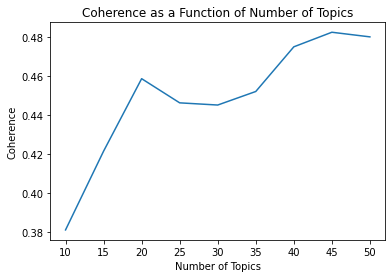

In [100]:
plt.plot(topic_nums, coherence_scores)
plt.title('Coherence as a Function of Number of Topics')
plt.xlabel('Number of Topics')
plt.ylabel('Coherence')
plt.grid
plt.show